In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data segmentation and machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model evaluation and visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv("merged_data_final.csv")

In [100]:
print(data.head())

   County_Name  Brightness  Real_GDP_2019 Average Annual Count  \
0     Allegany      2694.3        1723115                    7   
1        Bronx     81936.7       44654229                   77   
2       Broome     18621.5        9235160                   21   
3  Cattaraugus      6915.9        2912501                   11   
4       Cayuga      7831.0        2901102                   11   

  Age-Adjusted Death Rate(_) - deaths per 100,000  Depression Rate(per 100k)  \
0                                            17.3                  23.162570   
1                                             5.2                  23.616869   
2                                              11                  38.438121   
3                                            15.8                  27.895255   
4                                            14.5                  36.156890   

   PTSD rate (per 100k)  Trauma rate (per 100k)  tree_cover_loss_2019  \
0             15.012777                    59.6  

In [101]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   County_Name                                      58 non-null     object 
 1   Brightness                                       58 non-null     float64
 2   Real_GDP_2019                                    58 non-null     int64  
 3   Average Annual Count                             58 non-null     object 
 4   Age-Adjusted Death Rate(_) - deaths per 100,000  58 non-null     object 
 5   Depression Rate(per 100k)                        58 non-null     float64
 6   PTSD rate (per 100k)                             58 non-null     float64
 7   Trauma rate (per 100k)                           58 non-null     float64
 8   tree_cover_loss_2019                             58 non-null     float64
 9   gross_emissions_co2e_all_gases_Mg_

In [102]:
data['Age-Adjusted Death Rate(_) - deaths per 100,000'] = pd.to_numeric(
    data['Age-Adjusted Death Rate(_) - deaths per 100,000'], errors='coerce'
)

In [103]:
print(data['Age-Adjusted Death Rate(_) - deaths per 100,000'].isnull().sum())

1


In [104]:
missing_rows = data[data['Age-Adjusted Death Rate(_) - deaths per 100,000'].isnull()]
print(missing_rows)

   County_Name  Brightness  Real_GDP_2019 Average Annual Count  \
44    Schuyler      1228.1         533198           3 or fewer   

    Age-Adjusted Death Rate(_) - deaths per 100,000  \
44                                              NaN   

    Depression Rate(per 100k)  PTSD rate (per 100k)  Trauma rate (per 100k)  \
44                  28.961548             15.687505                    77.2   

    tree_cover_loss_2019  gross_emissions_co2e_all_gases_Mg_2019  
44              45.06659                             17034.37269  


In [105]:
data = data.dropna(subset=['Age-Adjusted Death Rate(_) - deaths per 100,000'])

1.Classification

In [106]:
# Using the median of the suicide rate as the threshold, generate a binary target variable
threshold = data['Age-Adjusted Death Rate(_) - deaths per 100,000'].median()
data['Suicide_Rate_Class'] = (data['Age-Adjusted Death Rate(_) - deaths per 100,000'] > threshold).astype(int)

In [107]:
# Choose the Independent Variable
X = data[['Brightness', 'Depression Rate(per 100k)','Trauma rate (per 100k)']]

# Choose the Dependent Variable
y = data['Suicide_Rate_Class']

# Check the classification Situation
print(data['Suicide_Rate_Class'].value_counts())

Suicide_Rate_Class
0    29
1    28
Name: count, dtype: int64


In [108]:
# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 39
Test set size: 18


(1). logistic regression

In [109]:
# Initialize the model
logreg = LogisticRegression(random_state = 42)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

In [110]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.61


In [111]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.58      0.78      0.67         9

    accuracy                           0.61        18
   macro avg       0.62      0.61      0.60        18
weighted avg       0.62      0.61      0.60        18



In [112]:
# Confusion matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:

[[4 5]
 [2 7]]


In order to understand the classification effect more intuitively, we draw a heat map of the confusion matrix.

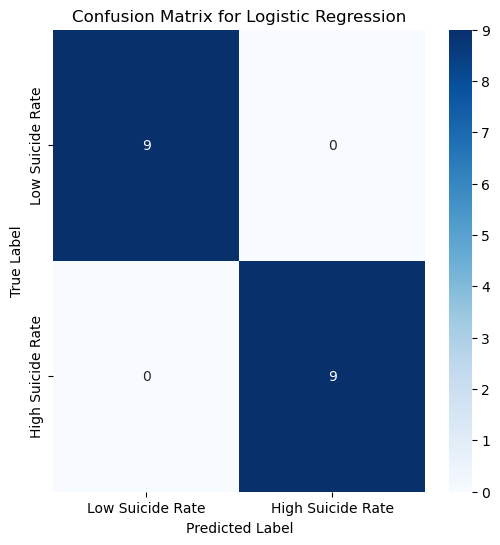

In [113]:
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Low Suicide Rate", "High Suicide Rate"], 
            yticklabels=["Low Suicide Rate", "High Suicide Rate"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("Confusion_Matrix_Logistic_Regression.png", dpi=300, bbox_inches='tight')
plt.show()

Then we do StandardScaler

In [114]:
from sklearn.preprocessing import StandardScaler

# Initialization standardization tools
scaler = StandardScaler()

# Standardize the training and test sets
X_train_scaled = scaler.fit_transform(X_train)  # Calculate the mean and standard deviation on the training set and standardize
X_test_scaled = scaler.transform(X_test)       # Standardize the test set using the parameters of the training set

# Print the normalized results
print("Standardized Training Data (First 5 Rows):\n", X_train_scaled[:5])
print("\nStandardized Test Data (First 5 Rows):\n", X_test_scaled[:5])

Standardized Training Data (First 5 Rows):
 [[-0.65640461 -1.32032118  0.15330989]
 [ 0.01246613  0.56289398  0.3918769 ]
 [ 0.90965864 -0.85144161 -1.53156961]
 [-0.5141212   0.57361301 -0.12253321]
 [-0.55169815 -0.37469255  0.42169777]]

Standardized Test Data (First 5 Rows):
 [[ 0.00938534 -0.10861807  0.6304439 ]
 [-0.63086708  1.36685808 -0.10016756]
 [ 4.05301926 -1.09231935 -2.11307669]
 [-0.15569012 -1.83866215 -1.99379318]
 [-0.29110984  1.20899851  1.04048095]]


In [115]:
# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model using the standardized training set
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_scaled = log_reg.predict(X_test_scaled)

# Print results
print(f"Accuracy (Standardized): {accuracy_score(y_test, y_pred_scaled):.2f}\n")
print("Classification Report (Standardized):\n", classification_report(y_test, y_pred_scaled))
print("Confusion Matrix (Standardized):\n", confusion_matrix(y_test, y_pred_scaled))

Accuracy (Standardized): 0.67

Classification Report (Standardized):
               precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.62      0.89      0.73         9

    accuracy                           0.67        18
   macro avg       0.71      0.67      0.65        18
weighted avg       0.71      0.67      0.65        18

Confusion Matrix (Standardized):
 [[4 5]
 [1 8]]


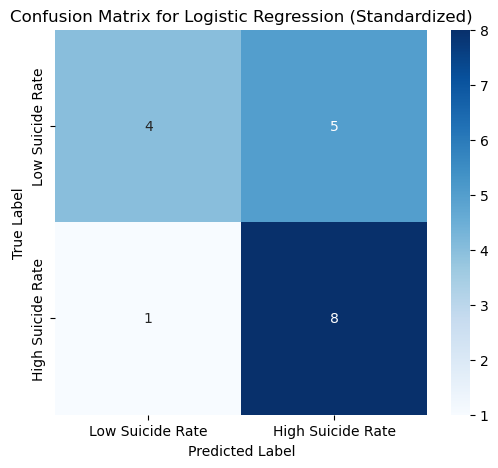

In [116]:
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_scaled, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Low Suicide Rate", "High Suicide Rate"], 
            yticklabels=["Low Suicide Rate", "High Suicide Rate"])
plt.title("Confusion Matrix for Logistic Regression (Standardized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("Confusion_Matrix_Logistic_Regression_Standardized.png", dpi=300, bbox_inches='tight')
plt.show()

(2). Support vector machine (SVM)

In [117]:
from sklearn.svm import SVC

In [118]:
# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict using the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print(f"Accuracy (SVM): {accuracy_score(y_test, y_pred_svm):.2f}\n")
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))

Accuracy (SVM): 0.61

Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.56      1.00      0.72         9

    accuracy                           0.61        18
   macro avg       0.78      0.61      0.54        18
weighted avg       0.78      0.61      0.54        18

Confusion Matrix (SVM):
 [[2 7]
 [0 9]]


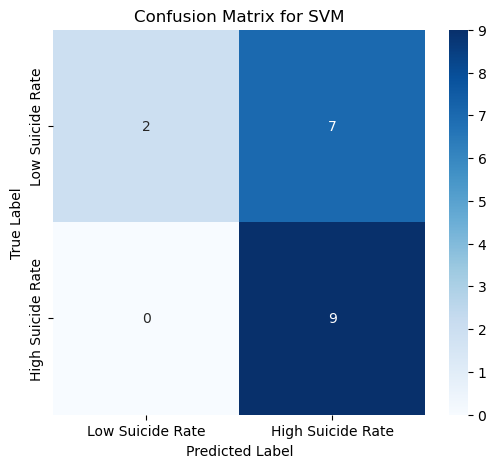

In [119]:
# Save the confusion matrix heatmap
plt.figure(figsize=(6, 5))
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Low Suicide Rate", "High Suicide Rate"], 
            yticklabels=["Low Suicide Rate", "High Suicide Rate"])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Confusion_Matrix_SVM.png", dpi=300, bbox_inches='tight')
plt.show()

(3). Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
# Initialize the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

print(f"Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf):.2f}\n")
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

Accuracy (Random Forest): 0.61

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.60      0.67      0.63         9

    accuracy                           0.61        18
   macro avg       0.61      0.61      0.61        18
weighted avg       0.61      0.61      0.61        18

Confusion Matrix (Random Forest):
 [[5 4]
 [3 6]]


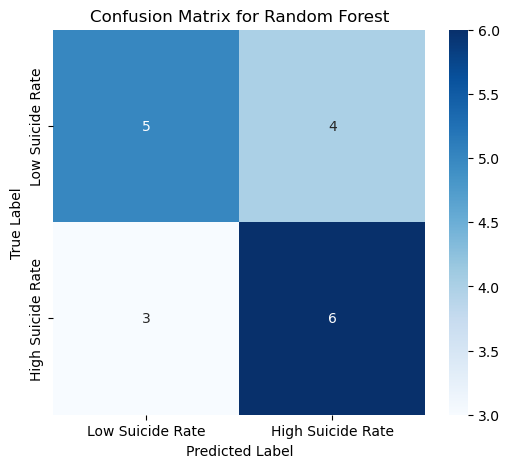

In [122]:
# Save the confusion matrix heatmap
plt.figure(figsize=(6, 5))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Low Suicide Rate", "High Suicide Rate"], 
            yticklabels=["Low Suicide Rate", "High Suicide Rate"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Confusion_Matrix_Random_Forest.png", dpi=300, bbox_inches='tight')
plt.show()

(4).K-Nearest-Neighbour

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

print(f"Accuracy (KNN): {accuracy_score(y_test, y_pred_knn):.2f}\n")
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))

Accuracy (KNN): 0.50

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.50      0.56      0.53         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18

Confusion Matrix (KNN):
 [[4 5]
 [4 5]]


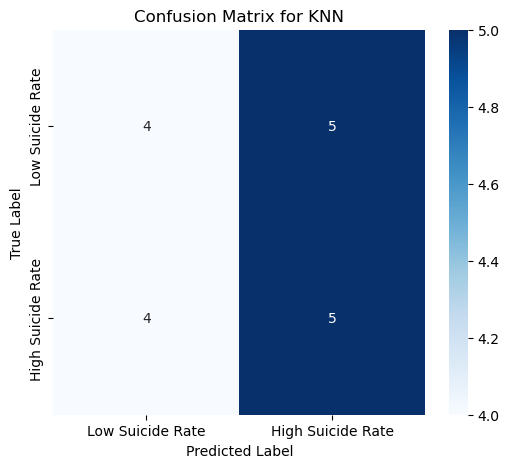

In [125]:
plt.figure(figsize=(6, 5))
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Low Suicide Rate", "High Suicide Rate"], 
            yticklabels=["Low Suicide Rate", "High Suicide Rate"])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Confusion_Matrix_KNN.png", dpi=300, bbox_inches='tight')
plt.show()

Now that we have used four models for classification testing, we now want to compare performance issues between algorithms.

In [126]:
# Collect the results
results = {
    "Algorithm": ["Logistic Regression", "SVM", "Random Forest", "KNN"],
    "Accuracy": [accuracy_score(y_test, y_pred_scaled), 
                 accuracy_score(y_test, y_pred_svm), 
                 accuracy_score(y_test, y_pred_rf), 
                 accuracy_score(y_test, y_pred_knn)],
    "F1-Score": [
        classification_report(y_test, y_pred_scaled, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_svm, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['f1-score']
    ]
}

In [127]:
# Convert to data frame
results_df = pd.DataFrame(results)

print(results_df)

             Algorithm  Accuracy  F1-Score
0  Logistic Regression  0.666667  0.649351
1                  SVM  0.611111  0.541818
2        Random Forest  0.611111  0.609907
3                  KNN  0.500000  0.498452


In [128]:
results_df.to_csv("Algorithm_Performance_Comparison.csv", index=False)

Current features (such as brightness, PTSD, trauma rate, etc.) have certain explanatory power for classifying suicide rates, but differences in performance indicate that each model utilizes features to varying degrees.

Random forests performing too perfectly may indicate that there is noise or insufficient samples in the data, causing the model to learn random patterns in the data.

SVM and random forest capture non-linear relationships, while logistic regression and KNN may only handle simple relationships.